## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Read the data as an appropriate Time Series data and plot the data.

In [1]:
#Import the requred libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Sparkling.csv')

In [3]:
df_1 = pd.read_csv('Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)

In [4]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
# Tail of the data
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [6]:
# Shape
df.shape

(187, 2)

In [7]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

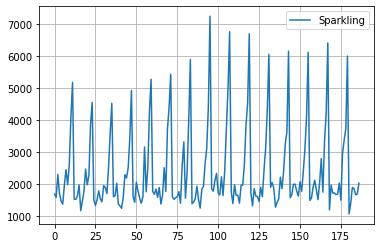

In [8]:
# Plot the data
df.plot();
plt.grid()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [9]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [10]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [11]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


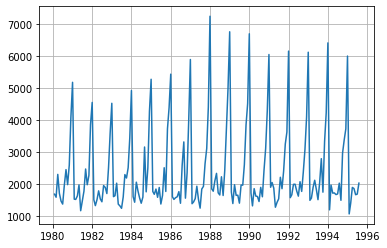

In [12]:
plt.plot(df['Time_Stamp'],df['Sparkling']);
plt.grid()

## Describe the data

In [13]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


## Plot a year on year boxplot for the Wine sales.

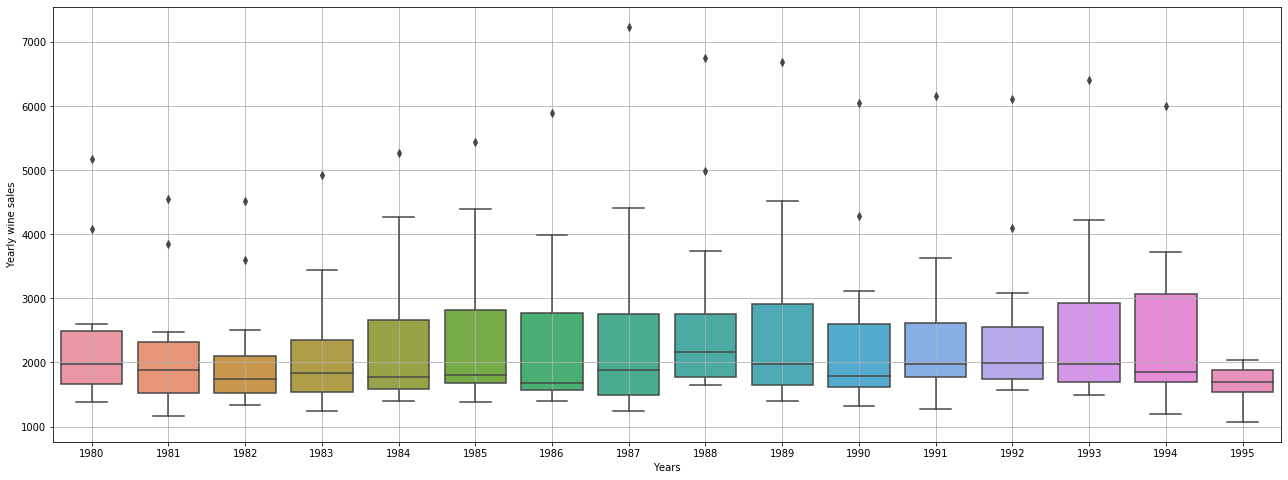

In [14]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly wine sales');

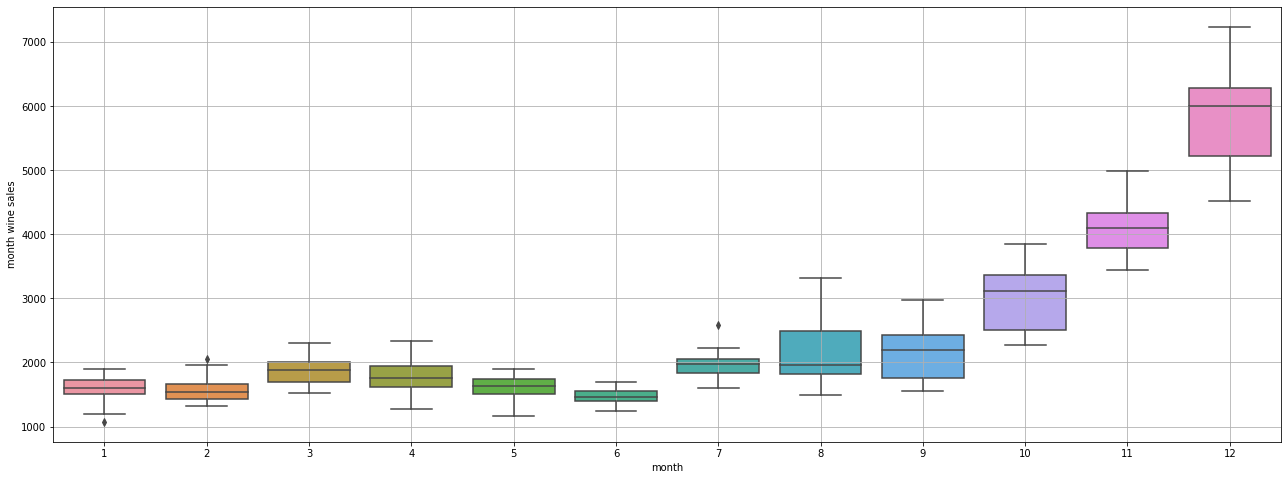

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('month');
plt.ylabel('month wine sales');

## Plot a monthly boxplot for the Wine sales taking all the years into account

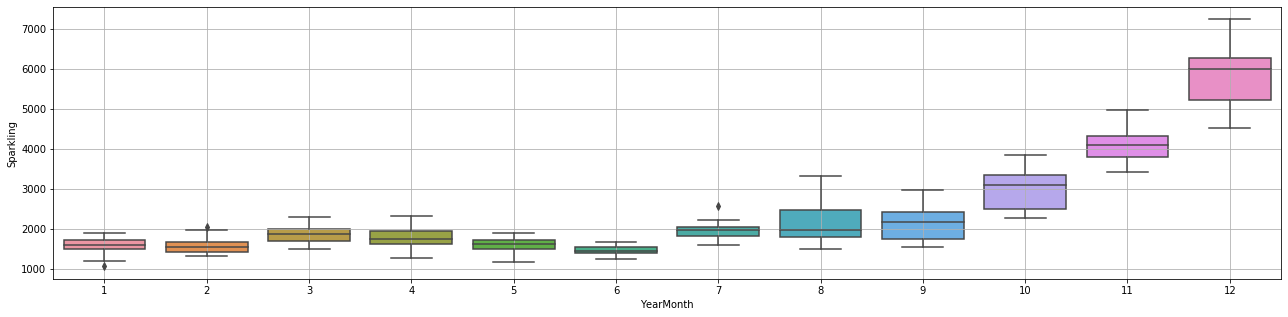

In [16]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

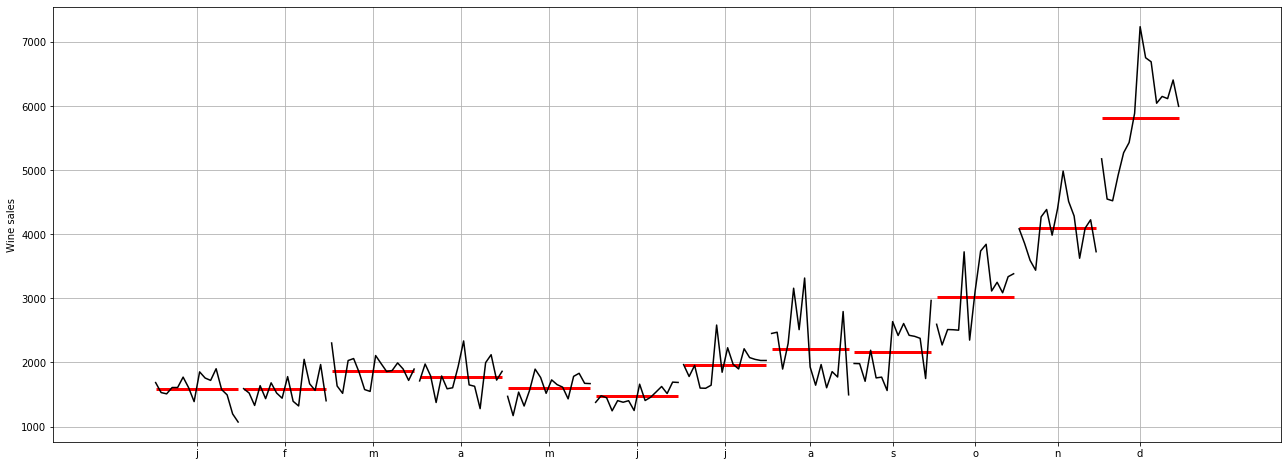

In [17]:
# plotting the month plot on given time series
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine sales',ax=ax)
plt.grid();

In [18]:
# Plotting the time series according to different time for different years

df.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [19]:
df.drop(labels='YearMonth',inplace=True,axis=1)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


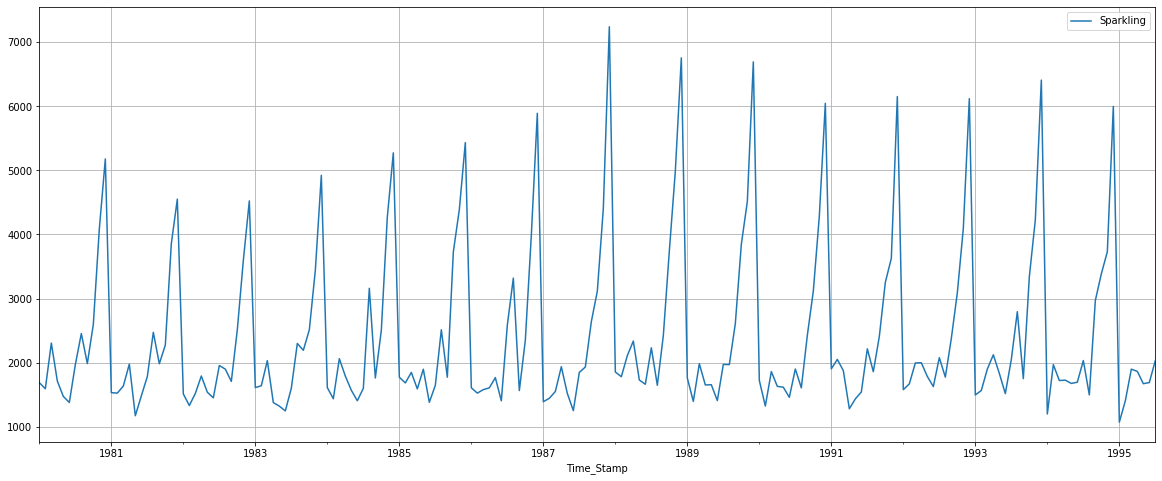

In [20]:
## Plotting the same graph from the second dataframe with the date-time modifications

df.plot(figsize=(20,8))
plt.grid();

In [21]:
df['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1995-03-31    1897
1995-04-30    1862
1995-05-31    1670
1995-06-30    1688
1995-07-31    2031
Name: Sparkling, Length: 187, dtype: int64

In [22]:
# Plot a graph manually sales across the years
monthly_sparkling_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sparkling_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


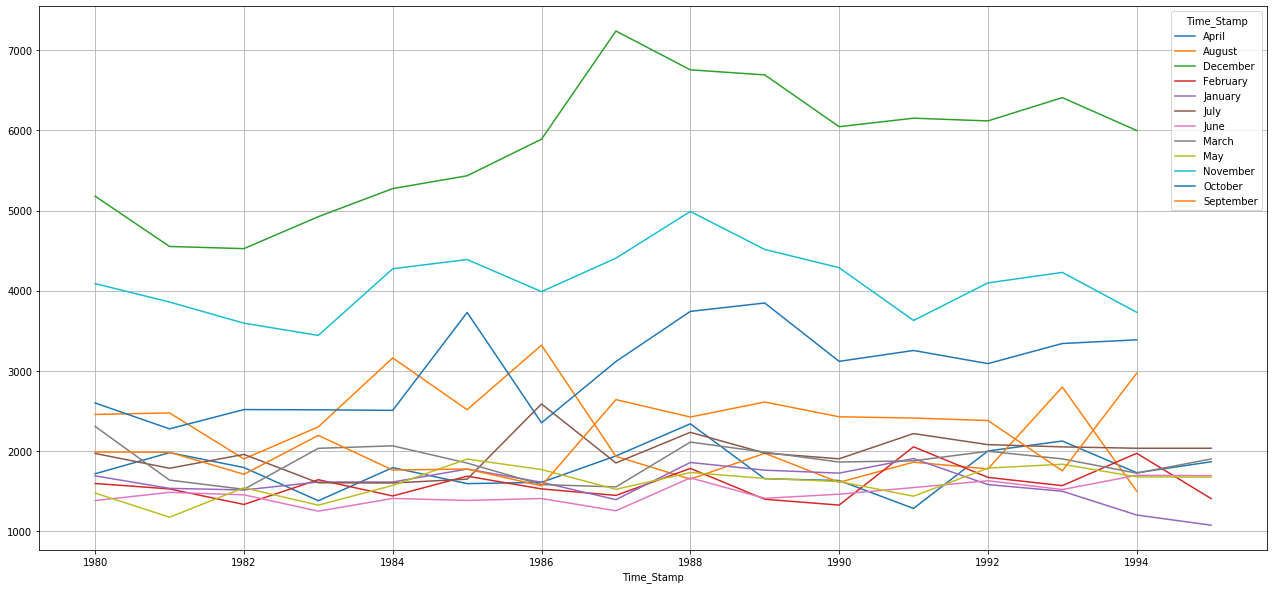

In [23]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sparkling_across_years.plot(ax=ax)
plt.grid();

## Decomposing the Time Series
### Additive model

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

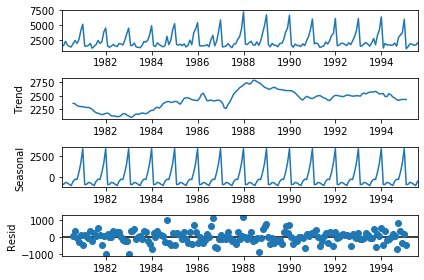

In [25]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the years of the data. There is a seasonality as well.So series is Additive

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [27]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [28]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

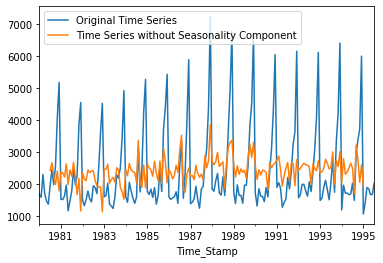

In [29]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## Multiplicative Model

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


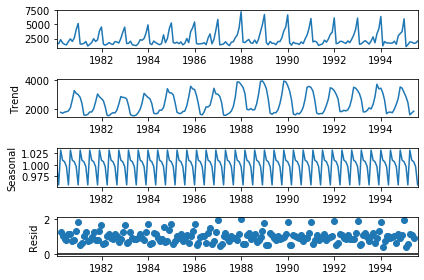

In [30]:
decomposition = seasonal_decompose(df,model='multiplicative', freq=5)
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31    1752.8
1980-04-30    1691.0
1980-05-31    1766.0
1980-06-30    1795.8
1980-07-31    1850.2
1980-08-31    2075.2
1980-09-30    2617.2
1980-10-31    3259.8
1980-11-30    3075.2
1980-12-31    2983.0
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.995970
1980-02-29    0.956678
1980-03-31    1.031308
1980-04-30    1.009669
1980-05-31    1.006375
1980-06-30    0.995970
1980-07-31    0.956678
1980-08-31    1.031308
1980-09-30    1.009669
1980-10-31    1.006375
1980-11-30    0.995970
1980-12-31    0.956678
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31    1.274564
1980-04-30    1.002724
1980-05-31    0.827679
1980-06-30    0.769892
1980-07-31    1.110706
1980-08-31    1.146170
1980-09-30    0.750803
1980-10-31    0.791323
1980-11-30    1.334397
1980-12-31    1.814792
Name: resid, dtype: float64 



## 3.  Split the data into training and test. The test data should start in 1991.

In [32]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [33]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [34]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [35]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


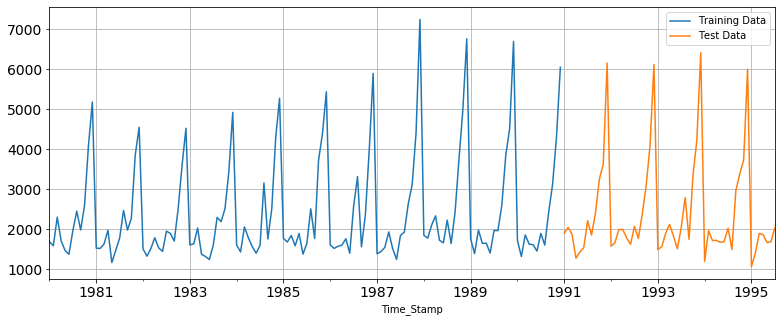

In [36]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. - Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

In [37]:
from sklearn import metrics

In [38]:
## Mean Absolute Percentage Error - Function Definition
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

## Model 1: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
## Let us get the last value (or the most recent value) of the training set.
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [41]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

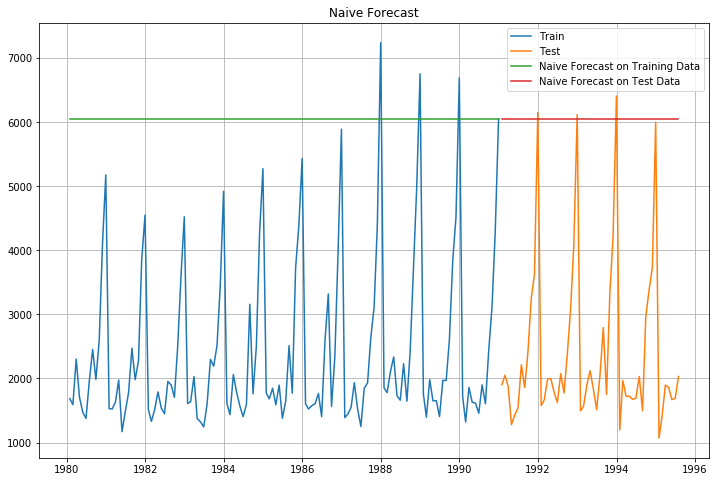

In [42]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

## Model Evaluation

In [43]:
## Train Data - RMSE and MAPE
rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [44]:
## Test Data - RMSE and MAPE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87


## Method 2 : Simple Average 

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
## Let us get the last value (or the most recent value) of the training set.
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_forecast
Time_Stamp,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [48]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


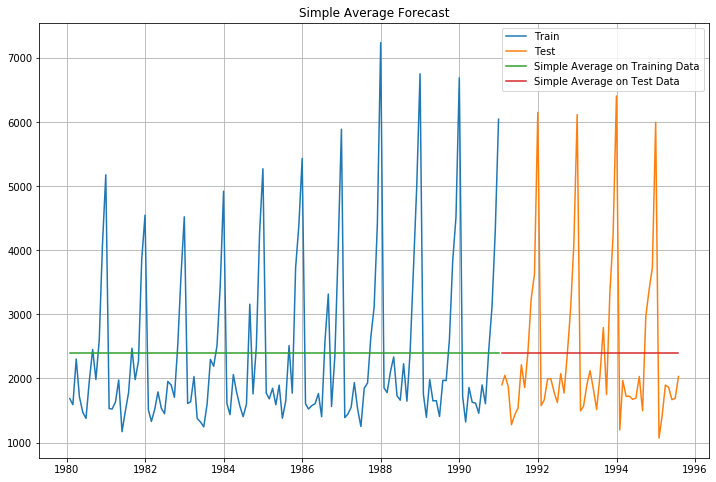

In [49]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [50]:
## Train Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [51]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [52]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90


## MEthod 3 : Moving Average

In [53]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [54]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


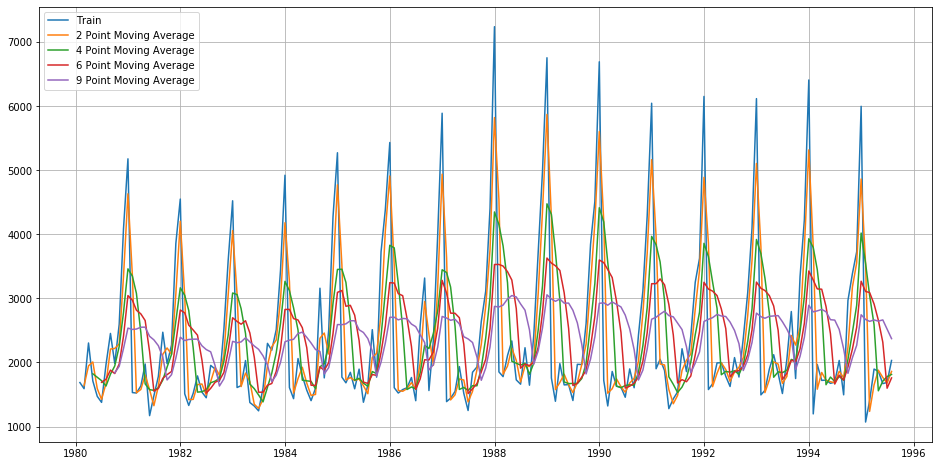

In [55]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [56]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

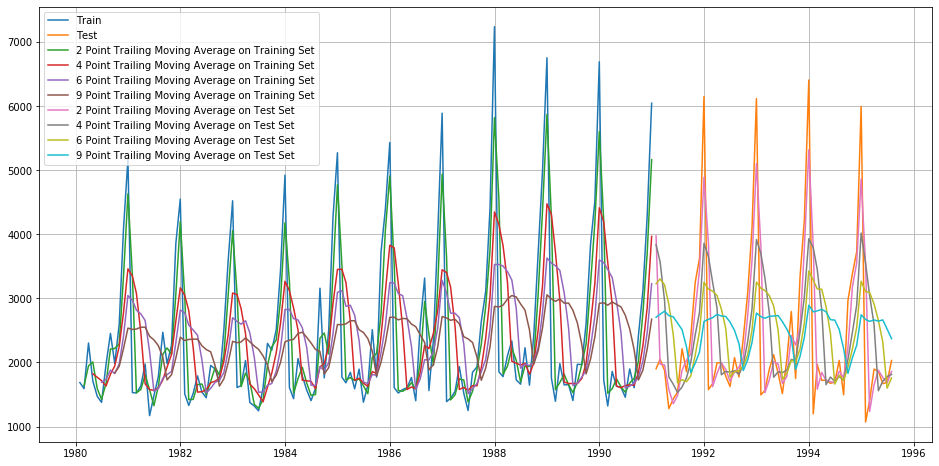

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

## Model Evaluation

Done only on test data

In [58]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the TEST Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the TEST Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the TEST Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the TEST Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the TEST Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the TEST Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the TEST Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the TEST Data,  RMSE is 1346.278 MAPE is 46.86


In [59]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots

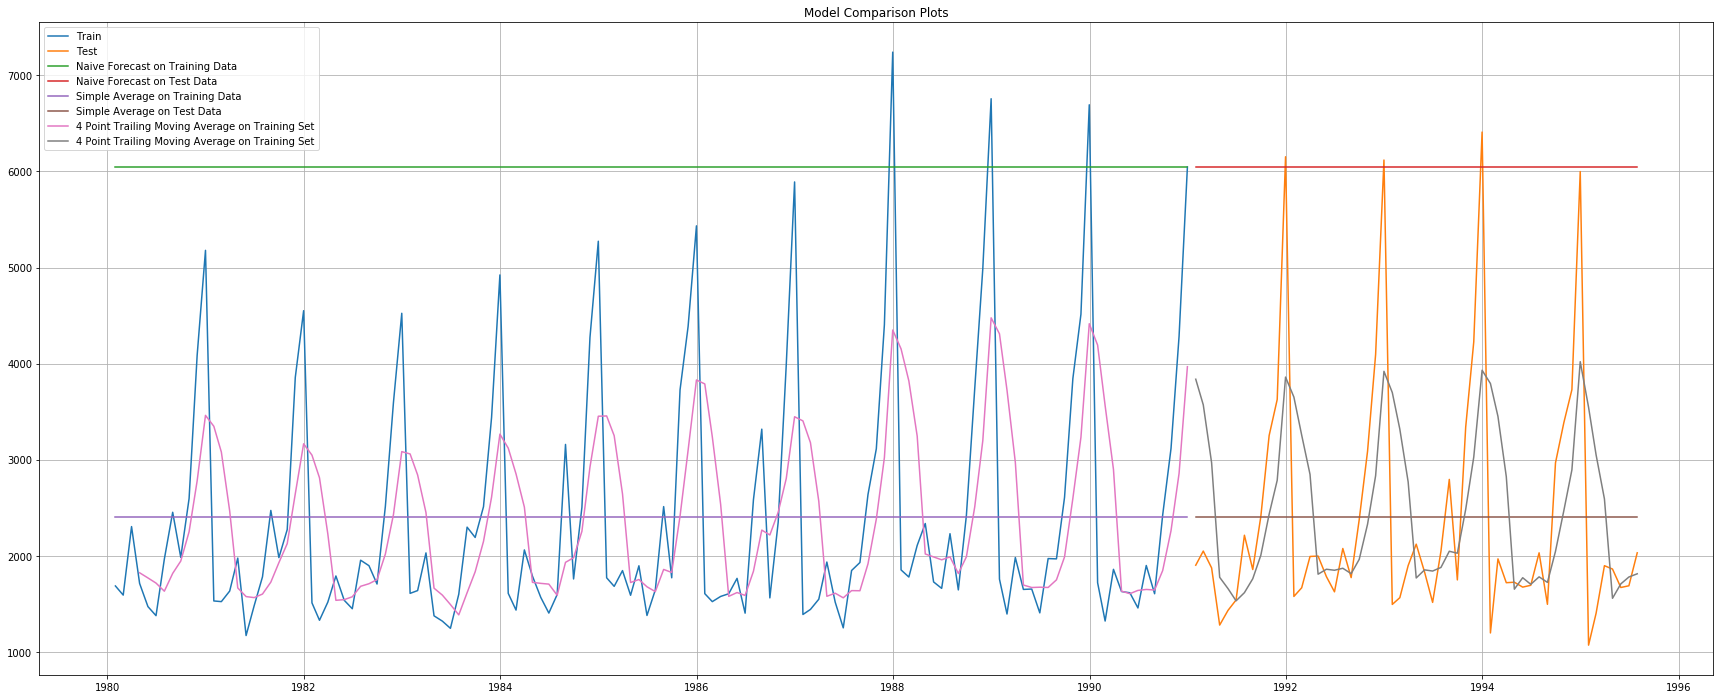

In [60]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')


plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 4: Simple Exponential Smoothing

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [62]:
SES_train = train.copy()
SES_test = test.copy()

In [63]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [74]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [75]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [76]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7699592849744,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Sparkling,predict
Time_Stamp,,
1980-01-31,1686,2403.769959
1980-02-29,1591,2403.769959
1980-03-31,2304,2403.769959
1980-04-30,1712,2403.769959
1980-05-31,1471,2403.769959


In [78]:
len(SES_test)

55

In [79]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2403.769959
1991-02-28,2049,2403.769959
1991-03-31,1874,2403.769959
1991-04-30,1279,2403.769959
1991-05-31,1432,2403.769959


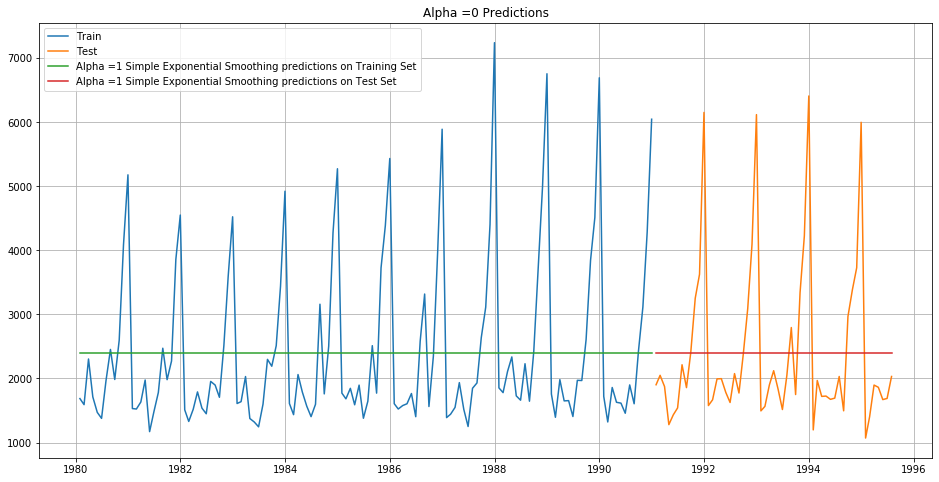

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions');

## Model Evaluation for 𝛼 = 0 : Simple Exponential Smoothing

In [81]:
## Training Data
rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sparkling'],SES_train['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,RMSE is 1298.484 MAPE is 40.36


In [82]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,RMSE is 1275.082 MAPE is 38.90


In [83]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081766,38.90


Setting different alpha values.

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test se

In [84]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [85]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

## Model Evaluation

In [86]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,1359.511747,43.73,1935.507132,75.66
1,0.4,1352.588879,42.75,2311.919615,91.55
2,0.5,1344.004369,41.16,2666.351413,106.27
3,0.6,1338.805381,39.80,2979.204388,118.77
4,0.7,1338.844308,38.55,3249.944092,129.34
5,0.8,1344.462091,37.60,3483.801006,138.34
6,0.9,1355.723518,36.79,3686.794285,146.08


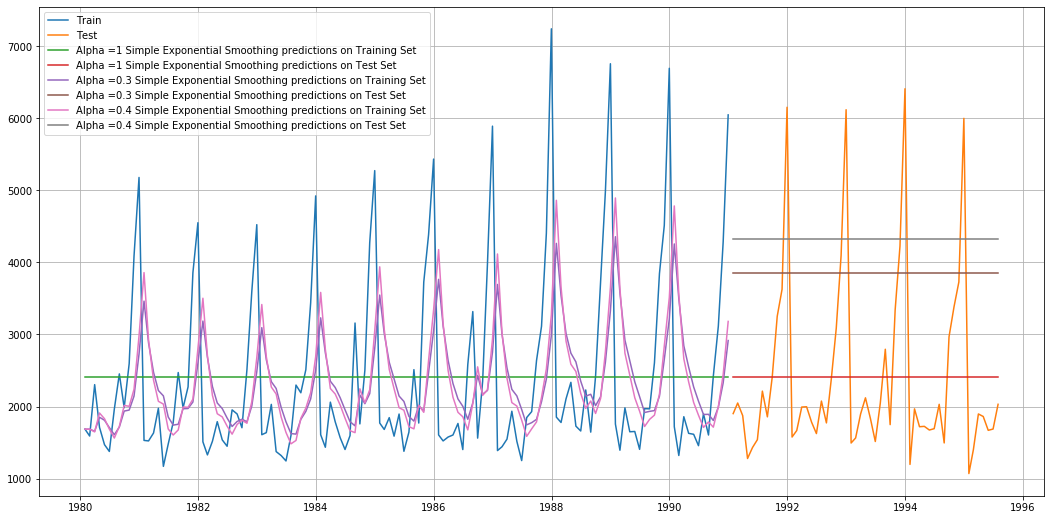

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [88]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081766,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55


## Method 6: Double Exponential Smoothing (Holt's Model)
Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [89]:
DES_train = train.copy()
DES_test = test.copy()

In [90]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [91]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [92]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [93]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1592.292788,53.75,18259.110704,675.28
1,0.3,0.4,1682.573828,57.13,26069.841401,960.18
2,0.3,0.5,1771.710791,59.92,34401.512440,1264.55
3,0.3,0.6,1848.576510,62.06,42162.748095,1548.94
4,0.3,0.7,1899.949006,62.87,47832.397419,1757.91
...,...,...,...,...,...,...
59,1.0,0.6,1753.402326,45.75,49327.087977,1824.42
60,1.0,0.7,1825.187155,47.97,52655.765663,1945.23
61,1.0,0.8,1902.013709,50.11,55442.273880,2046.36
62,1.0,0.9,1985.368445,52.03,57823.177011,2132.75


In [95]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
32,0.7,0.3,1500.689062,41.37,30524.407568,1137.22
24,0.6,0.3,1506.449870,42.79,29070.722592,1082.18
40,0.8,0.3,1509.149801,40.23,31689.588069,1181.30
48,0.9,0.3,1528.900682,38.56,32650.778085,1217.64
16,0.5,0.3,1530.575845,45.92,27095.532414,1007.39


In [96]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,1592.292788,53.75,18259.110704,675.28
8,0.4,0.3,1569.338606,50.06,23878.496940,886.00
1,0.3,0.4,1682.573828,57.13,26069.841401,960.18
16,0.5,0.3,1530.575845,45.92,27095.532414,1007.39
24,0.6,0.3,1506.449870,42.79,29070.722592,1082.18


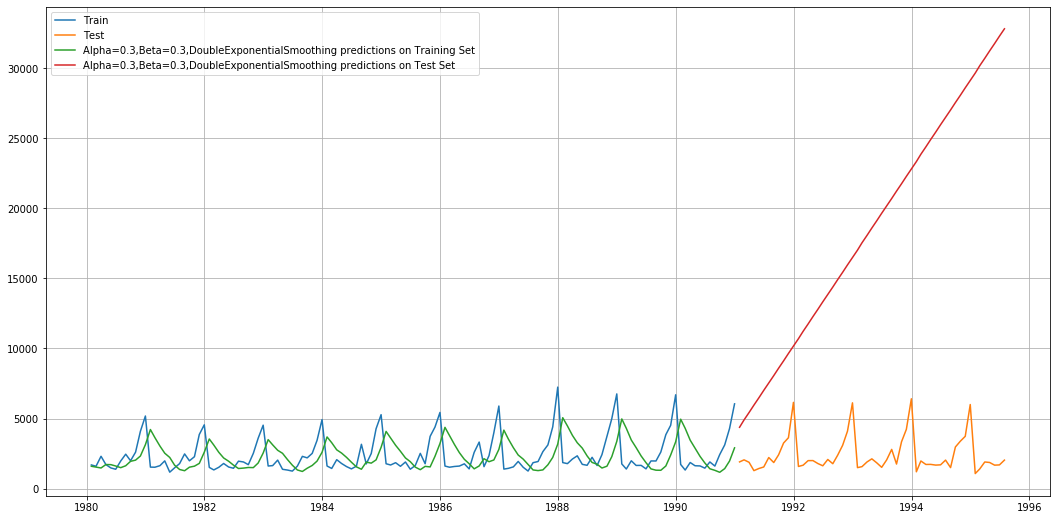

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081766,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704,675.28


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [99]:
TES_train = train.copy()
TES_test = test.copy()

In [100]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [101]:
model_TES_autofit = model_TES.fit()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [102]:
model_TES_autofit.params

{'smoothing_level': 0.1542083535027195,
 'smoothing_slope': 5.361180138115455e-21,
 'smoothing_seasonal': 0.3713208918084863,
 'damping_slope': nan,
 'initial_level': 1639.999332568416,
 'initial_slope': 4.8479923574482715,
 'initial_seasons': array([1.00842785, 0.96899359, 1.24180901, 1.13206657, 0.93979277,
        0.93811023, 1.22457816, 1.54427962, 1.27335447, 1.63197608,
        2.48291821, 3.11861259]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sparkling,auto_predict
Time_Stamp,,
1980-01-31,1686,1658.709856
1980-02-29,1591,1602.587985
1980-03-31,2304,2057.519027
1980-04-30,1712,1915.828476
1980-05-31,1471,1568.900621


In [104]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1602.194701
1991-02-28,2049,1373.890341
1991-03-31,1874,1807.440797
1991-04-30,1279,1704.576059
1991-05-31,1432,1602.376669


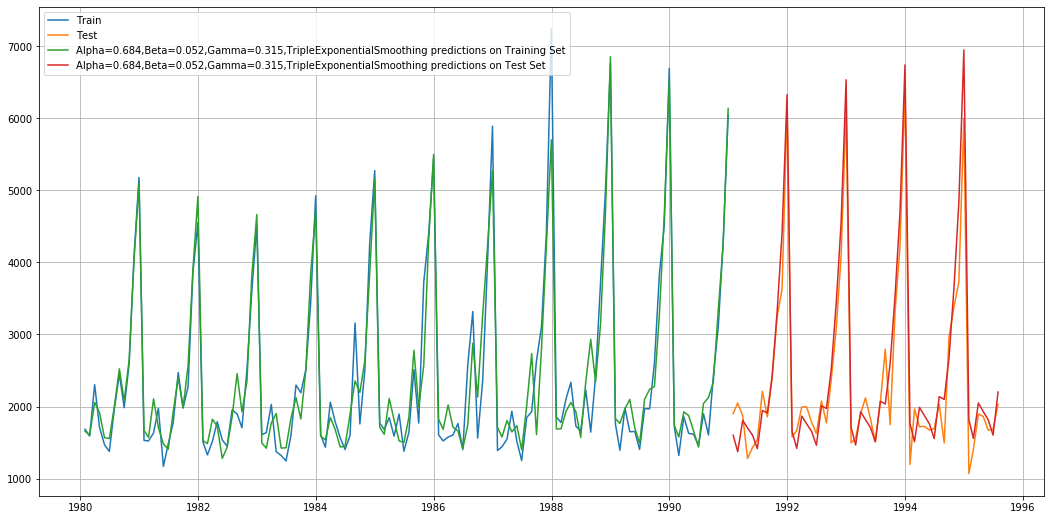

In [105]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [106]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,RMSE is 353.379 MAPE is 10.17


In [107]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.166 MAPE is 11.91


In [108]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081766,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704,675.28


In [109]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [110]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [111]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,404.513320,11.21,3.927862e+02,13.51
1,0.3,0.3,0.4,402.088628,11.01,9.513202e+02,32.86
2,0.3,0.3,0.5,408.282432,11.05,1.470487e+03,50.27
3,0.3,0.3,0.6,428.631668,11.51,2.181724e+03,73.51
4,0.3,0.3,0.7,468.958530,12.68,3.513351e+03,115.38
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,153394.791826,1428.87,7.989790e+05,17177.41
508,1.0,1.0,0.7,94040.964958,1036.30,1.074413e+06,28878.00
509,1.0,1.0,0.8,102196.953755,888.48,5.010607e+06,65738.32
510,1.0,1.0,0.9,77924.294413,876.07,4.318265e+05,6048.85


In [112]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,404.513320,11.21,392.786198,13.51
8,0.3,0.4,0.3,424.828055,11.78,410.854547,12.90
65,0.4,0.3,0.4,435.553595,11.76,421.409170,14.84
296,0.7,0.8,0.3,700.317756,18.33,518.188752,18.86
130,0.5,0.3,0.5,498.239915,13.87,542.175497,18.23


In [113]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
8,0.3,0.4,0.3,424.828055,11.78,410.854547,12.90
0,0.3,0.3,0.3,404.513320,11.21,392.786198,13.51
65,0.4,0.3,0.4,435.553595,11.76,421.409170,14.84
134,0.5,0.3,0.9,901.166743,21.72,597.528174,18.13
130,0.5,0.3,0.5,498.239915,13.87,542.175497,18.23


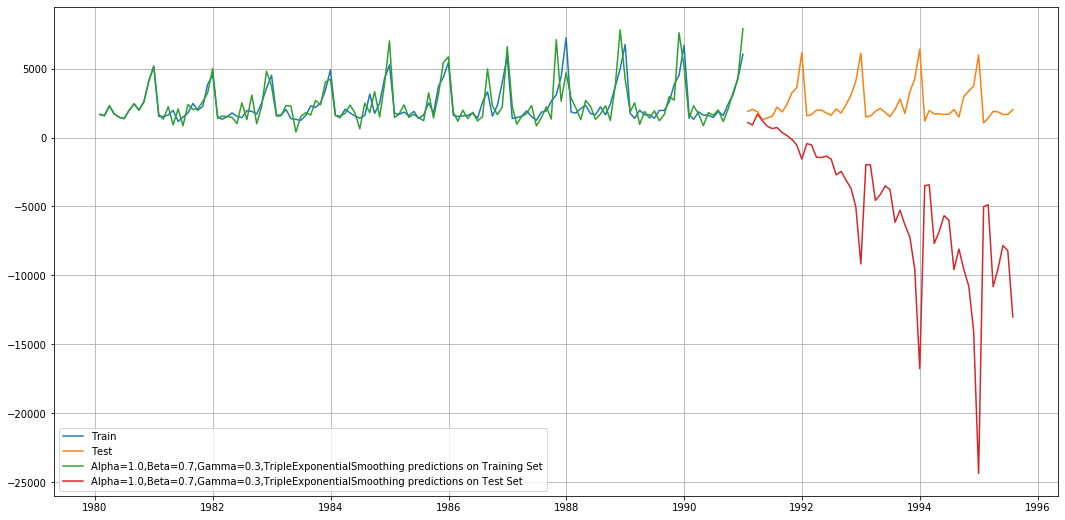

In [115]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [116]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][480]],'Test MAPE':[resultsDf_8_2['Test MAPE'][480]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081766,38.90
"Alpha=0.3,SimpleExponentialSmoothing",1935.507132,75.66
"Alpha=0.4,SimpleExponentialSmoothing",2311.919615,91.55
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.110704,675.28


In [117]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...    383.165741      11.91
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
Alpha=0,SimpleExponentialSmoothing                   1275.081766      38.90
SimpleAverageModel                                   1275.081804      38.90
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132      75.66
Alpha=0.4,SimpleExponentialSmoothing                 2311.919615      91.55
NaiveModel                                           3864.279352     152.87
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...   9262.603615     302.83
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing 

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gaves us the best accuracy (least RMSE and MAPE).anaconda/

The one models to be built on the whole data are the following:

Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing

In [118]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.684,
                                                                 smoothing_slope=0.052,
                                                                 smoothing_seasonal=0.315)

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [119]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 435.69712576444635 
MAPE: 12.82


In [120]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

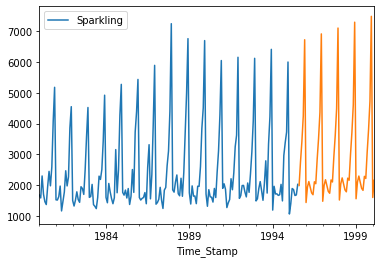

In [121]:
df.plot()
prediction_1.plot();

In [122]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,498.165539,1995.555060,9219.525138
1995-09-30,1265.459269,2762.848790,9986.818868
1995-10-31,1921.609859,3418.999380,10642.969458
1995-11-30,2751.759700,4249.149221,11473.119299
1995-12-31,5223.511511,6720.901031,13944.871109


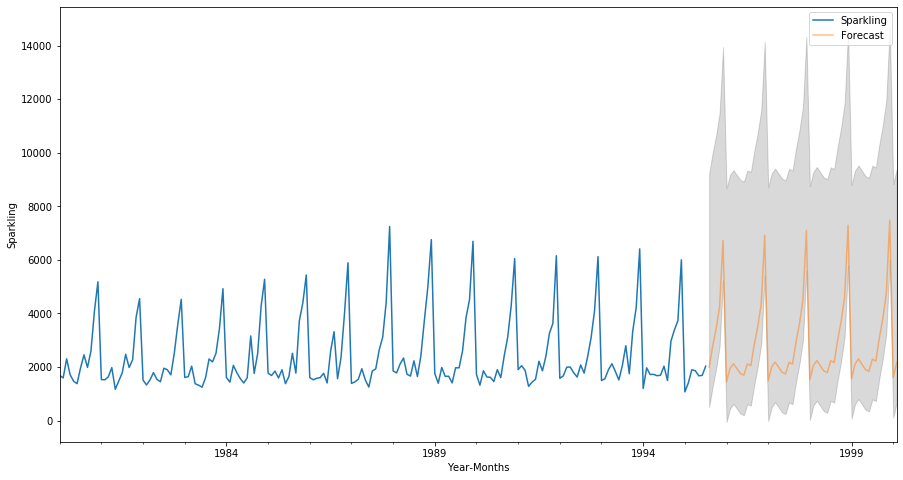

In [123]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

When we look at the predicted values with the respective confidence intervals, we see that even for a 95% confidence interval, the shaded area in the above graph (confidence interval) is quite high).

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

## 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [124]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

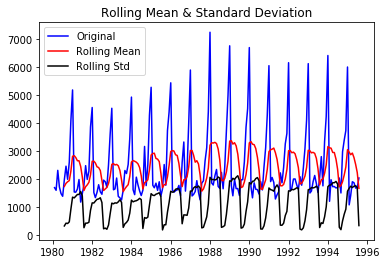

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [125]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

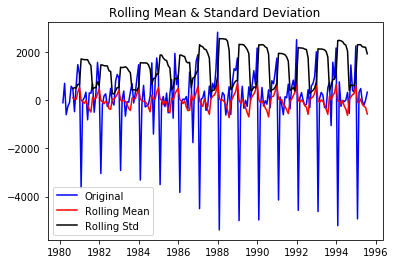

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [126]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at 𝛼 = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

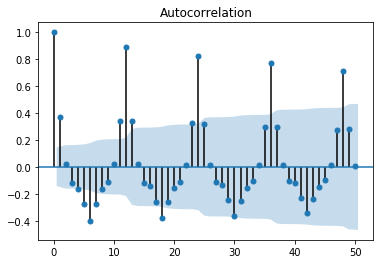

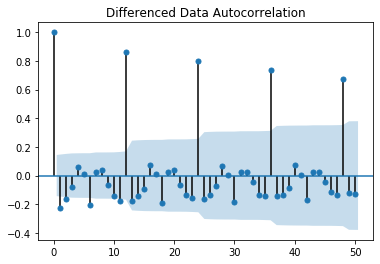

In [128]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


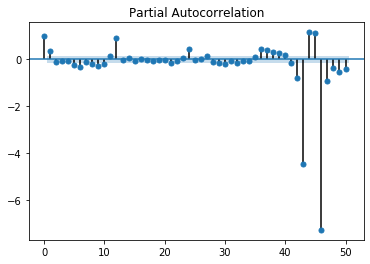

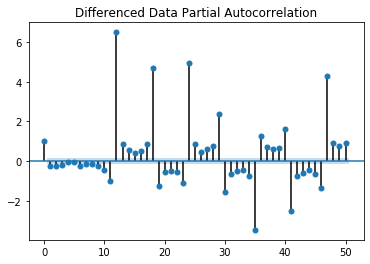

In [129]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE

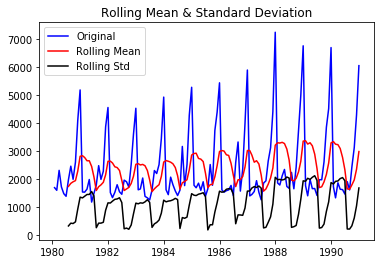

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [130]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at 𝛼 = 0.05.

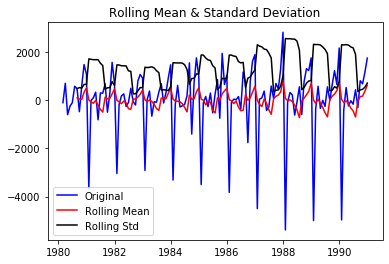

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [131]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [133]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [134]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [135]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.783097684079
ARIMA(1, 1, 0) - AIC:2268.5280605749745
ARIMA(1, 1, 1) - AIC:2235.013945350647
ARIMA(1, 1, 2) - AIC:2233.5976471206027
ARIMA(2, 1, 0) - AIC:2262.035601288871
ARIMA(2, 1, 1) - AIC:2232.360489881479
ARIMA(2, 1, 2) - AIC:2210.6286896012016


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [136]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.628690
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035601
1,"(0, 1, 1)",2264.906439
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [137]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.314
Method:                       css-mle   S.D. of innovations           1014.039
Date:                Wed, 16 Sep 2020   AIC                           2210.629
Time:                        13:32:10   BIC                           2227.880
Sample:                    02-29-1980   HQIC                          2217.639
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5841      0.520     10.733      0.000       4.564       6.604
ar.L1.D.Sparkling     1.2698      0.075     17.037      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Predict on the Test Set using this model and evaluate the model

In [138]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [139]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1373.8854932032486


In [140]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1373.885493


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


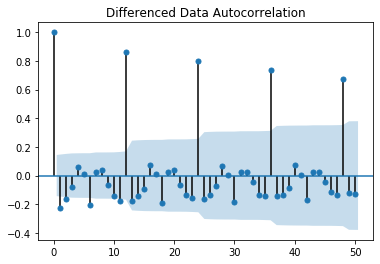

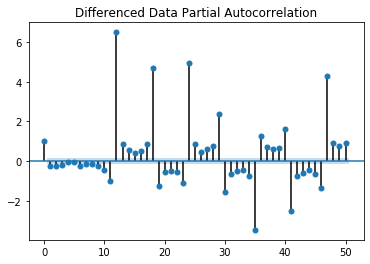

In [141]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0. The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0. By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 1.

In [142]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1105.987
Date:                Wed, 16 Sep 2020   AIC                           2228.927
Time:                        13:32:21   BIC                           2249.053
Sample:                    02-29-1980   HQIC                          2237.105
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9843        nan        nan        nan         nan         nan
ar.L1.D.Sparkling    -0.4420        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


We get a comparatively simpler model by looking at the ACF and the PACF plots

## Predict on the Test Set using this model and evaluate the model

In [143]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1378.8881739517349


In [144]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1373.885493
"ARIMA(3,1,2)",1378.888174


We see that the difference in RMSE values is about 2 with a much simpler model built.

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA mode

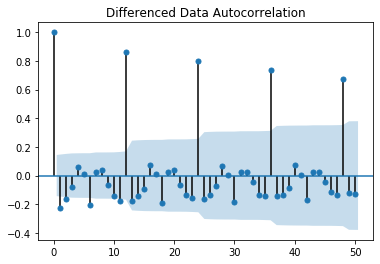

In [145]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()


We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

## Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [146]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [147]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [148]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.3780761716307
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.6355536890592
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.559984442916
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.936011093946
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993617510636
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.917780565962
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.565285908283
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.187633954395
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.5732428784872
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.517429813489
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.7093274322672
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.7885105486303
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.771793321626
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.7036709109914
SARIMA(0, 1, 2)x(0,

In [149]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.678698
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888804
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.192582
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703671
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778


In [150]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Wed, 16 Sep 2020   AIC                           1727.679
Time:                                   13:38:10   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.257      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

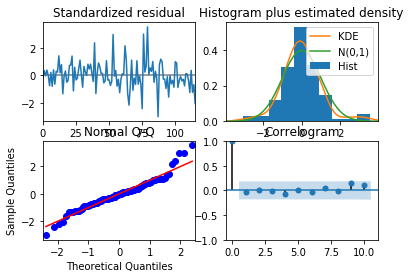

In [151]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

## Predict on the Test Set using this model and evaluate the model

In [152]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [153]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.381780,380.566527,584.485094,2076.278467
1,1177.294230,392.119130,408.754858,1945.833603
2,1625.913946,392.313303,856.994001,2394.833891
3,1546.306102,397.714377,766.800247,2325.811957
4,1308.739511,398.933733,526.843763,2090.635260


In [154]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9256093203738


In [155]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1373.885493
"ARIMA(3,1,2)",1378.888174
"SARIMA(1,1,2)(2,0,2,6)",626.925609


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

## Setting the seasonality as 12 for the first iteration of the auto SARIMA model

In [156]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [157]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [158]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.261461684497
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640234888
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389124
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791858
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158614405
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920829
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.768864956646
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572996629
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838118
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319374833
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.131965593777
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954180997
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245085378875
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.36837394272

In [159]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934574
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340403


In [160]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 16 Sep 2020   AIC                           1555.584
Time:                                    13:48:40   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

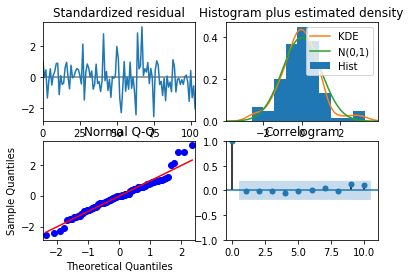

In [161]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model

In [162]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.425937,388.344059,566.285567,2088.566307
1,1315.137019,402.005085,527.221531,2103.052506
2,1621.624182,401.998688,833.721232,2409.527133
3,1598.896284,407.235411,800.729546,2397.063022
4,1392.720915,407.965242,593.123735,2192.318096


In [163]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5913290718681


In [164]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1373.885493
"ARIMA(3,1,2)",1378.888174
"SARIMA(1,1,2)(2,0,2,6)",626.925609
"SARIMA(1,1,2)(1,0,2,12)",528.591329


We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


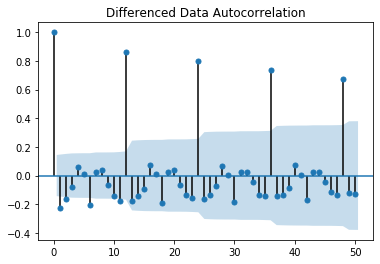

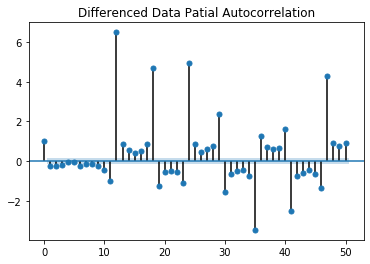

In [165]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

## Building the most optimum model on the Full Data

In [166]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.630
Date:                            Wed, 16 Sep 2020   AIC                           1219.260
Time:                                    13:50:14   BIC                           1245.462
Sample:                                         0   HQIC                          1229.765
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7556      0.151     -5.013      0.000      -1.051      -0.460
ar.L2          0.1168      0.185   

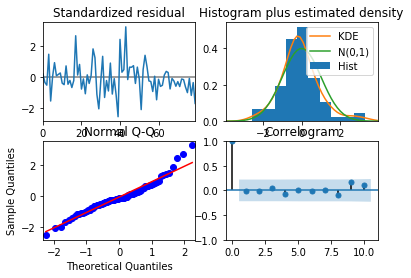

In [167]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model

In [168]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1510.174064,425.103506,676.986504,2343.361625
1,1431.604526,440.087179,569.049505,2294.159547
2,1850.326747,440.158944,987.631068,2713.022426
3,1781.876782,440.904660,917.719529,2646.034036
4,1550.356002,440.894916,686.217846,2414.494158


In [169]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

329.5568022621898


8. ### Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data

In [170]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1373.885493
"ARIMA(3,1,2)",1378.888174
"SARIMA(1,1,2)(2,0,2,6)",626.925609
"SARIMA(1,1,2)(1,0,2,12)",528.591329
"SARIMA(3,1,2)(3,1,2,12)",329.556802


## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

###  Building the most optimum model

In [171]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1000.243
Date:                            Wed, 16 Sep 2020   AIC                           2022.487
Time:                                    13:53:05   BIC                           2054.445
Sample:                                01-31-1980   HQIC                          2035.473
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8611      0.090     -9.546      0.000      -1.038      -0.684
ar.L2          0.0116      0.129   

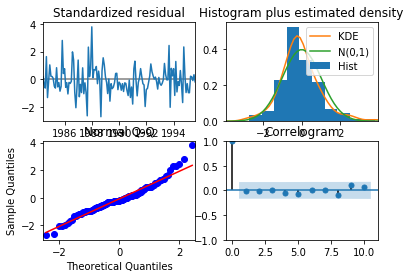

In [172]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year)

In [173]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1868.686793,396.478204,1091.603792,2645.769794
1995-09-30,2511.278853,401.829017,1723.708451,3298.849255
1995-10-31,3272.580687,402.678399,2483.345527,4061.815846
1995-11-30,3874.346998,403.093191,3084.298861,4664.395135
1995-12-31,6098.907219,403.113086,5308.820088,6888.994350


In [174]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 578.9447986843545


In [175]:
pred_full_manual_SARIMA_date =predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31',freq='M'))

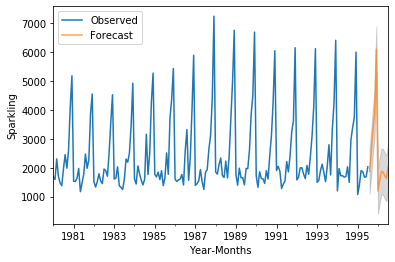

In [176]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [177]:
resultsDf

,RMSE
"ARIMA(2,1,2)",1373.885493
"ARIMA(3,1,2)",1378.888174
"SARIMA(1,1,2)(2,0,2,6)",626.925609
"SARIMA(1,1,2)(1,0,2,12)",528.591329
"SARIMA(3,1,2)(3,1,2,12)",329.556802
